In [1]:
import math
from scipy import stats
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from pydataset import data
import statistics
import seaborn as sns
from pydataset import data

import acquire as aq
import prepare as prep

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Data Acquisition Exercises

### Exercise 4:
In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. 
- Create a pandas dataframe, df_iris, from this data.

In [2]:
import pandas as pd
from acquire import get_iris_data

In [3]:
#renaming the db
df_iris = get_iris_data()
df_iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


- print the first 3 rows ✅ 
- print the number of rows and columns (shape) ✅ 
- print the column names ✅ 
- print the data type of each column ✅ 
- print the summary statistics for each of the numeric variables ✅ 

In [4]:
#Print the first 3 rows:
df_iris.head(3)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2


In [5]:
#print the number of rows and columns (shape)
df_iris.shape

(150, 6)

In [6]:
#print the column names
df_iris.columns

Index(['species_id', 'species_name', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width'],
      dtype='object')

In [7]:
#print the data type of each column
df_iris.dtypes

species_id        int64
species_name     object
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [8]:
#print the summary statistics for each of the numeric variables
df_iris_t= df_iris.describe().T
df_iris_t

,count,mean,std,min,25%,50%,75%,max
species_id,150.0,2.000000,0.819232,1.0,1.0,2.00,3.0,3.0
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### Exercise 5:
Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

Make sure that the spreadsheet is publicly visible under your sharing settings.

In [9]:
from acquire import google_sheets

In [10]:
#creating table1_custdetails into a dataframe named df_google_sheets
df_google_sheets=google_sheets()

In [11]:
df_google_sheets

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,742.90,No,13.5
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes,22.0
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,92.75,No,1.8
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,4627.65,No,68.2


- assign the first 100 rows to a new dataframe, df_google_sheets_sample ✅ 
- print the number of rows of your original dataframe ✅ 
- print the first 5 column names ✅ 
- print the column names that have a data type of object ✅ 
- compute the range for each of the numeric variables. ✅ 

In [12]:
#assign the first 100 rows to a new dataframe, df_google_sheets_sample
df_google_sheets_sample = df_google_sheets.head(100)
df_google_sheets_sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes,3.2
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,571.45,No,8.2
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No,72.1
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,5377.80,No,63.5
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,340.35,No,7.1
9,0016-QLJIS,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,5957.90,No,65.9


In [13]:
#print the number of rows of your original dataframe
df_google_sheets.shape

(7049, 13)

In [14]:
#print the first 5 column names
df_google_sheets.iloc[:0,:5]

,customer_id,gender,is_senior_citizen,partner,dependents


In [15]:
#OR....
df_google_sheets.columns[:5] #slicing data with the []

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [16]:
#print the column names that have a data type of object
df_google_sheets.dtypes[df_google_sheets.dtypes == "object"].index.values

array(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'], dtype=object)

In [17]:
#OR..
df_google_sheets.select_dtypes(include='object').describe()

,customer_id,gender,partner,dependents,payment_type,churn
count,7049,7049,7049,7049,7049,7049
unique,7043,2,2,2,4,2
top,0048-LUMLS,Male,No,No,Electronic check,No
freq,2,3558,3642,4934,2365,5179


In [18]:
df_google_sheets.select_dtypes(include='object').columns.tolist()

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [19]:
#compute the range for each of the numeric variables.
#seeing which dtypes are float (as int64 ones are all boolean in this df)

float=df_google_sheets.dtypes[df_google_sheets.dtypes == "float"].index.values

float

array(['monthly_charges', 'total_charges', 'tenure'], dtype=object)

In [20]:
#taking these float columns and finding their range

monthly_range = df_google_sheets.monthly_charges.max()-df_google_sheets.monthly_charges.min()
total_range = df_google_sheets.total_charges.max()-df_google_sheets.total_charges.min()
tenure_range = df_google_sheets.tenure.max()-df_google_sheets.tenure.min()

monthly_range,total_range,tenure_range

(100.5, 8666.0, 79.3)

In [21]:
### Another way of doing this:
#first, move describe horizontally for statistical totals to be the columns
df_google_sheets.describe().T

,count,mean,std,min,25%,50%,75%,max
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80
tenure,7049.0,32.380068,24.594926,0.00,8.7000,28.70,55.200,79.30


In [22]:
#let's name this describe().T as a function/df so as to use in finding the range
df_t=df_google_sheets.describe().T
df_t

,count,mean,std,min,25%,50%,75%,max
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80
tenure,7049.0,32.380068,24.594926,0.00,8.7000,28.70,55.200,79.30


In [23]:
#now, let's just look at the max and min columns
df_t[['max','min']].describe().T

,count,mean,std,min,25%,50%,75%,max
max,7.0,1269.978571,3269.970313,1.0,2.0,2.0,99.025,8684.8
min,7.0,5.292857,9.040669,0.0,0.0,0.0,9.125,18.8


In [24]:
#let's get the range, but subtracting the min from the max of each numeric variable
df_t.max() - df_t.min()

count      11.000000
mean     2282.881874
std      2266.153499
min        18.800000
25%       401.587500
50%      1397.100000
75%      3793.775000
max      8683.800000
dtype: float64

### Exercise 6:

Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

In [25]:
#when acquiring data (using the acquire.py, remember to import either wholesale of the file OR use the FROM acquire import____df wantied)
from acquire import excel_file
df_excel = excel_file()
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.6,593.30,No,9.044207
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.9,542.40,No,9.055092
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.9,280.85,Yes,3.800406
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.0,1237.85,Yes,12.631122
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.9,267.40,Yes,3.187128


- assign the first 100 rows to a new dataframe, df_excel_sample ✅ 
- print the first 5 column names ✅ 
- print the column names that have a data type of object ✅ 
- compute the range for each of the numeric variables. ✅ 

In [26]:
#assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample=df_excel.head(100)
df_excel_sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.60,593.30,No,9.044207
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.90,542.40,No,9.055092
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.90,280.85,Yes,3.800406
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.00,1237.85,Yes,12.631122
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.90,267.40,Yes,3.187128
5,0013-MHZWF,Female,0.0,No,Yes,1.0,1.0,0.0,Credit card (automatic),69.40,571.45,No,8.234150
6,0013-SMEOE,Female,1.0,Yes,No,1.0,2.0,2.0,Bank transfer (automatic),109.70,7904.25,No,72.053327
7,0014-BMAQU,Male,0.0,Yes,No,2.0,2.0,2.0,Credit card (automatic),84.65,5377.80,No,63.529829
8,0015-UOCOJ,Female,1.0,No,No,1.0,1.0,0.0,Electronic check,48.20,340.35,No,7.061203
9,0016-QLJIS,Female,0.0,Yes,Yes,2.0,1.0,2.0,Mailed check,90.45,5957.90,No,65.869541


In [27]:
#print the number of rows of your original dataframe
df_excel.shape

(7049, 13)

In [28]:
#print the first 5 column names
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [29]:
#print the column names that have a data type of object
df_excel.dtypes[df_excel.dtypes == 'object']

customer_id     object
gender          object
partner         object
dependents      object
payment_type    object
churn           object
dtype: object

### Exercise 7:
Read the data from this google sheet into a dataframe, df_google.

In [30]:
from acquire import get_train_data
df_train=get_train_data()
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- print the first 3 rows ✅ 
- print the number of rows and columns ✅ 
- print the column names ✅ 
- print the data type of each column ✅ 
- print the summary statistics for each of the numeric variables ✅ 
- print the unique values for each of your categorical variables ✅ 

In [31]:
#First three rows
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [32]:
#Number of rows and columns
df_train.shape

(891, 12)

In [33]:
#Column names
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
#Datatypes 
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [35]:
#summary statistics of numerical values
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [36]:
#Find the unique variables in these categorical columns
#note, do NOT add name as that sends back EVERY unique name...
cat_values=df_train[['Survived','Sex','Pclass','SibSp','Parch','Embarked']]
for col in cat_values.columns:
    print(col, cat_values[col].dropna().unique())

Survived [0 1]
Sex ['male' 'female']
Pclass [3 1 2]
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q']


## Data Preparation Exercises

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

<b>Using the Iris Data:</b>

- Use the function defined in acquire.py to load the iris data. ✅ 

- Drop the species_id and measurement_id columns. ✅ 

- Rename the species_name column to just species. ✅ 

- Create dummy variables of the species name. ✅ 

- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied. ✅ 

In [37]:
import acquire
import prepare
import pandas as pd
df = acquire.get_iris_data()
df.head()

#Drop duplicates
df.drop_duplicates(inplace=True)
df

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
5,1,setosa,5.4,3.9,1.7,0.4
6,1,setosa,4.6,3.4,1.4,0.3
7,1,setosa,5.0,3.4,1.5,0.2
8,1,setosa,4.4,2.9,1.4,0.2
9,1,setosa,4.9,3.1,1.5,0.1


#### Takeaways: Next for Cleaning
- Drop the Unnamed, species_id and measurement_id columns
- Rename the species_name column to just 'species'

In [38]:
#drop the columns
columns_to_drop = ['species_id']
#rename df so it does not interfere with og df
sepal_data = df.drop(columns=columns_to_drop) 
sepal_data

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


In [39]:
sepal_data.rename(columns = {'species_name':'species'}, inplace = True)
sepal_data

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


#### Takeaways, and next steps:
- Create dummy variables of the species name.

- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [40]:
#create dummy variables of the species name
dummy_df = pd.get_dummies(sepal_data[['species']], dummy_na=False, drop_first=[True])
dummy_df

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [41]:
# Concatenate my dummy_df to my data
sepal_data1= pd.concat([sepal_data, dummy_df], axis=1)
sepal_data1

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0
5,setosa,5.4,3.9,1.7,0.4,0,0
6,setosa,4.6,3.4,1.4,0.3,0,0
7,setosa,5.0,3.4,1.5,0.2,0,0
8,setosa,4.4,2.9,1.4,0.2,0,0
9,setosa,4.9,3.1,1.5,0.1,0,0


In [42]:
#testing the function by grabbig a new version of the dirty data (get_iris..) and applying the clean_df function
df = acquire.get_iris_data() #grabbing old dataset
clean_df= prepare.prep_iris(df) #applying clean function
clean_df

(        species  sepal_length  sepal_width  petal_length  petal_width  \
 123   virginica           6.3          2.7           4.9          1.8   
 125   virginica           7.2          3.2           6.0          1.8   
 112   virginica           6.8          3.0           5.5          2.1   
 6        setosa           4.6          3.4           1.4          0.3   
 67   versicolor           5.8          2.7           4.1          1.0   
 69   versicolor           5.6          2.5           3.9          1.1   
 31       setosa           5.4          3.4           1.5          0.4   
 144   virginica           6.7          3.3           5.7          2.5   
 87   versicolor           6.3          2.3           4.4          1.3   
 134   virginica           6.1          2.6           5.6          1.4   
 53   versicolor           5.5          2.3           4.0          1.3   
 89   versicolor           5.5          2.5           4.0          1.3   
 41       setosa           4.5        

#### Using the Titanic Dataset

Use the function defined in acquire.py to load the Titanic data.

- Drop any unnecessary, unhelpful, or duplicated columns.

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

- Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [43]:
from acquire import new_titanic_data
df = new_titanic_data()

#Drop duplicates
df.drop_duplicates(inplace=True)
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


### Takeaways: 
- Drop columns class, embarked and passenger_id ✅ 
- Drop deck: not needed/too many NaNs ✅ 

In [44]:
#Drop columns
columns_to_drop=['embarked', 'class', 'passenger_id', 'deck']

In [45]:
data = df.drop(columns=columns_to_drop) #saved as a new variable so as not to mess up original data
data

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1
888,0,3,female,NaN,1,2,23.4500,Southampton,0
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1


### Encoding: Turning categorical columns into Boolean
- sex, embark_town (so both are easier to pull data)
    -we concat to the add to our data df ✅ 

In [46]:
#let's encode sex and embark_town
dummy_df = pd.get_dummies(data[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
data= pd.concat([data, dummy_df], axis=1)
data

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1,1,0,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1,0,0,1
888,0,3,female,NaN,1,2,23.4500,Southampton,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1,1,0,0


In [47]:
#Create a function named prep_titanic that accepts the raw titanic data, 
#and returns the data with the transformations above applied.
def clean_titanic_data(data):
    '''
    Takes in a titanic dataframe and returns a clean dataframe
    Arguments: df - a pandas dataframe with the expected feature names and columns
    Return: clean_df - a dataframe with the cleaning operations performed on it
    '''
    #Drop duplicates
    df.drop_duplicates(inplace=True)
    #Drop columns
    columns_to_drop=['embarked', 'class', 'passenger_id', 'deck']
    data = df.drop(columns=columns_to_drop) #saved as a new variable so as not to mess up original data
    #Encoding categorical variables
    dummy_df = pd.get_dummies(data[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])
    data= pd.concat([data, dummy_df], axis=1)
    return data.drop(columns=['sex','embark_town'])

In [48]:
df = acquire.new_titanic_data()
prep_titanic = clean_titanic_data(data)
prep_titanic

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,1,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


### Using the Telco dataset:

Use the function defined in acquire.py to load the Telco data.

- Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

- Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [49]:
import pandas as pd
from acquire import google_sheets
df = google_sheets()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 716.0+ KB


In [50]:
#wondering what contract_type was...
df.contract_type

0       1
1       0
2       0
3       0
4       0
       ..
7044    1
7045    0
7046    0
7047    2
7048    2
Name: contract_type, Length: 7049, dtype: int64

#### Inspect and Summarize

### Takeaways:
- create new column with strings for contract_type (helps understand what is being encoded later on)
- Encode gender, dependents and partner

In [51]:
#create new column to describe contract types
df["contract_type"].replace({0: "month_to_month", 1: "one_year", 2: "two_years"}, inplace=True)
df

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,one_year,Mailed check,65.60,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,month_to_month,Mailed check,59.90,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,month_to_month,Electronic check,73.90,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,month_to_month,Electronic check,98.00,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,month_to_month,Mailed check,83.90,267.40,Yes,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,one_year,Mailed check,55.15,742.90,No,13.5
7045,9992-RRAMN,Male,0,Yes,No,2,2,month_to_month,Electronic check,85.10,1873.70,Yes,22.0
7046,9992-UJOEL,Male,0,No,No,1,1,month_to_month,Mailed check,50.30,92.75,No,1.8
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,two_years,Mailed check,67.85,4627.65,No,68.2


In [52]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [53]:
#encoding columns:
dummy_df = pd.get_dummies(df[['gender', 'dependents', 'partner', 'contract_type', 'payment_type']], dummy_na=False, drop_first=[True, True, True, True])
dummy_df

,gender_Male,dependents_Yes,partner_Yes,contract_type_one_year,contract_type_two_years,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,1,1,0,0,0,1
1,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0
3,1,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
7044,0,0,0,1,0,0,0,1
7045,1,0,1,0,0,0,1,0
7046,1,0,0,0,0,0,0,1
7047,1,1,1,0,1,0,0,1


In [54]:
#concat to original
df_telco = pd.concat([df, dummy_df], axis=1)
df_telco

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,churn,tenure,gender_Male,dependents_Yes,partner_Yes,contract_type_one_year,contract_type_two_years,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,1,1,one_year,Mailed check,65.60,...,No,9.0,0,1,1,1,0,0,0,1
1,0003-MKNFE,Male,0,No,No,2,1,month_to_month,Mailed check,59.90,...,No,9.1,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,1,2,month_to_month,Electronic check,73.90,...,Yes,3.8,1,0,0,0,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,1,2,month_to_month,Electronic check,98.00,...,Yes,12.6,1,0,1,0,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,1,2,month_to_month,Mailed check,83.90,...,Yes,3.2,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,one_year,Mailed check,55.15,...,No,13.5,0,0,0,1,0,0,0,1
7045,9992-RRAMN,Male,0,Yes,No,2,2,month_to_month,Electronic check,85.10,...,Yes,22.0,1,0,1,0,0,0,1,0
7046,9992-UJOEL,Male,0,No,No,1,1,month_to_month,Mailed check,50.30,...,No,1.8,1,0,0,0,0,0,0,1
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,two_years,Mailed check,67.85,...,No,68.2,1,1,1,0,1,0,0,1


In [55]:
def clean_telco_data(df):
    '''
    Takes in the Telco dataset and cleans & prepares for test, validation and training purposes.
    '''
    #create new column to describe contract types
    df["contract_type"].replace({0: "month_to_month", 1: "one_year", 2: "two_years"}, inplace=True)
    #drop duplicates
    df.drop_duplicates(inplace=True)
    #encoding columns:
    dummy_df = pd.get_dummies(df[['gender', 'dependents', 'partner', 'contract_type', 'payment_type']], dummy_na=False, drop_first=[True, True, True, True])
    #concat to original
    df_telco = pd.concat([df, dummy_df], axis=1)
    return df_telco

In [56]:
#create a function named prep_telco that accepts the raw telco data, 
#and returns the data with the transformations above applied.
import acquire
df = acquire.google_sheets()
prep_telco= clean_telco_data(df)
prep_telco

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,churn,tenure,gender_Male,dependents_Yes,partner_Yes,contract_type_one_year,contract_type_two_years,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,1,1,one_year,Mailed check,65.60,...,No,9.0,0,1,1,1,0,0,0,1
1,0003-MKNFE,Male,0,No,No,2,1,month_to_month,Mailed check,59.90,...,No,9.1,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,1,2,month_to_month,Electronic check,73.90,...,Yes,3.8,1,0,0,0,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,1,2,month_to_month,Electronic check,98.00,...,Yes,12.6,1,0,1,0,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,1,2,month_to_month,Mailed check,83.90,...,Yes,3.2,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,one_year,Mailed check,55.15,...,No,13.5,0,0,0,1,0,0,0,1
7045,9992-RRAMN,Male,0,Yes,No,2,2,month_to_month,Electronic check,85.10,...,Yes,22.0,1,0,1,0,0,0,1,0
7046,9992-UJOEL,Male,0,No,No,1,1,month_to_month,Mailed check,50.30,...,No,1.8,1,0,0,0,0,0,0,1
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,two_years,Mailed check,67.85,...,No,68.2,1,1,1,0,1,0,0,1


### Exploratory Analysis Exercises:

#### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

- Acquire, prepare & split your data.

In [57]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

np.random.seed(123)

#import our iris dataset (cleaned, prepped, and split)
import pandas as pd
import acquire
import prepare

df= acquire.get_iris_data()

df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [58]:
#split into train validate and test
train, validate, test = prepare.prep_iris(df)


#### Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

In [59]:
#remember, we are using train to explore!!!
#let's find our descriptive statistics
train.describe().T
#note: our measurement types are below:

,count,mean,std,min,25%,50%,75%,max
sepal_length,83.0,5.826506,0.755481,4.4,5.25,5.7,6.4,7.9
sepal_width,83.0,3.068675,0.462477,2.2,2.70,3.0,3.4,4.4
petal_length,83.0,3.745783,1.731086,1.2,1.60,4.2,5.1,6.9
petal_width,83.0,1.197590,0.755787,0.1,0.40,1.3,1.8,2.5
species_versicolor,83.0,0.337349,0.475679,0.0,0.00,0.0,1.0,1.0
species_virginica,83.0,0.325301,0.471335,0.0,0.00,0.0,1.0,1.0


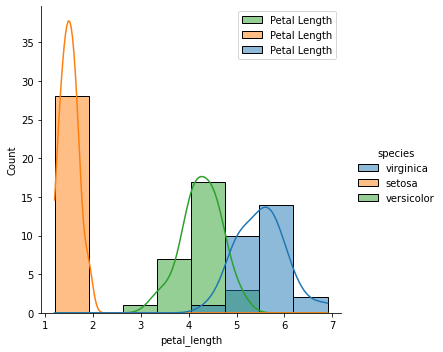

In [60]:
#using species as a columned hue shows us that the petal length has relation to what species it is when it comes to setosa, 
#versicolor and virginica seem fairly similar in petal length size
sns.displot(data=train, x="petal_length", hue="species", label="Petal Length", kde=True)

plt.legend() 
plt.show()

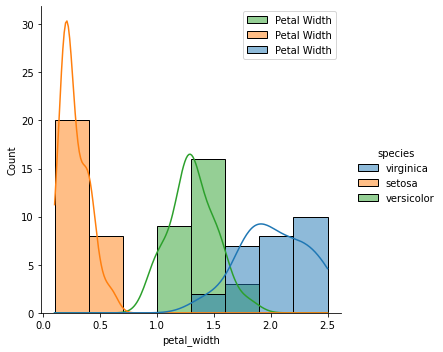

In [61]:
#the same can be said for petal width; majority of setosa iris species seem to be wider than the other two species
sns.displot(data=train, x="petal_width", hue="species", label="Petal Width", kde=True)
plt.legend() 
plt.show()

No handles with labels found to put in legend.


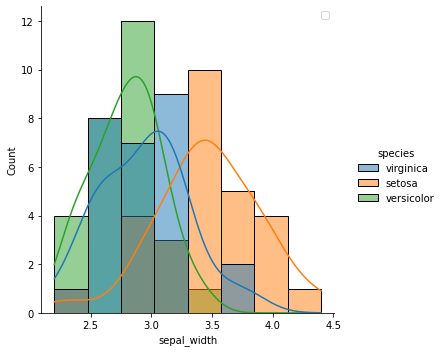

In [62]:
#sepal_width and species do not seem incredibly related
#there is a lot of similar sizes between species here
#however versicolor seems to have more sepal width that are larger than other iris'
sns.displot(data=train, x="sepal_width", hue="species", kde=True)
plt.legend() 
plt.show()

No handles with labels found to put in legend.


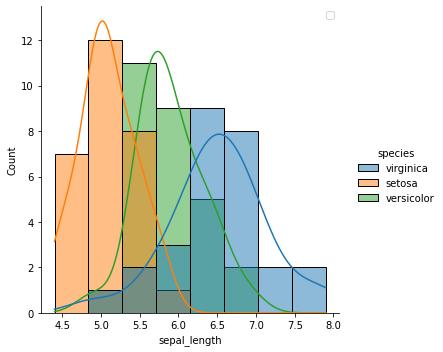

In [63]:
#sepal_length doesn't seem to be very related to species except that the iris' with the longer sepals tend to be setosa species
sns.displot(data=train, x="sepal_length", hue="species", kde=True)
plt.legend() 
plt.show()

<AxesSubplot:xlabel='petal_width', ylabel='species'>

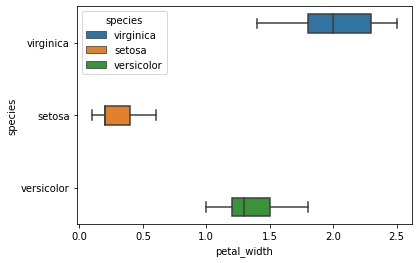

In [64]:
#this further shows that petal_width is related to the species of iris
import seaborn as sns
sns.boxplot(data=train, x="petal_width", y='species', orient="h", hue="species")

<AxesSubplot:xlabel='petal_length', ylabel='species'>

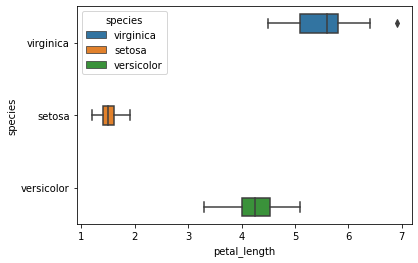

In [65]:
#this further shows that petal_length is related to the species of iris
import seaborn as sns
sns.boxplot(data=train, x="petal_length", y='species', orient="h", hue="species")

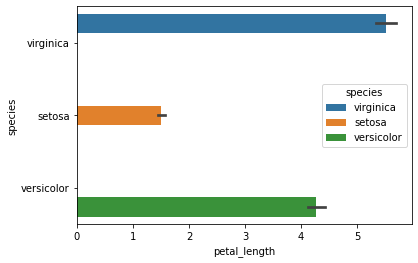

In [66]:
#creating bar plots for the petal lengths/widths and sepal length/widths
ax = sns.barplot(x="petal_length", y="species", hue="species", data=train)

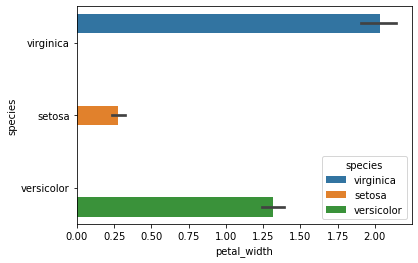

In [67]:
ax = sns.barplot(x="petal_width", y="species", hue="species", data=train)

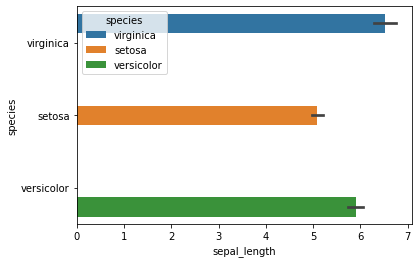

In [68]:
ax = sns.barplot(x="sepal_length", y="species", hue="species", data=train)

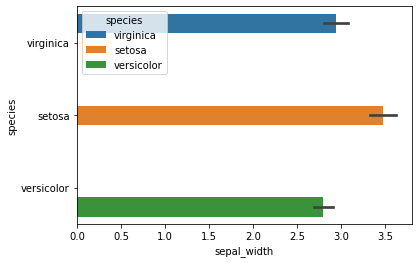

In [69]:
ax = sns.barplot(x="sepal_width", y="species", hue="species", data=train)

#### Takeaways:
- There seems to be a relation to species and petal length/width
- There does not seem to be a strong relation to species & sepal length/width

## Bivariate Stats
- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis). ✅ 

- For each measurement type, compute the descriptive statistics for each species. ✅ 

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types. ✅ 

- Document takeaways & any actions.

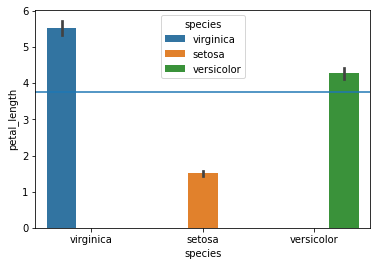

In [70]:
#Using petal-length (y-axis) and species(x-axis)in barplot:
#with horizontal line at mean()
ax = sns.barplot(x="species", y="petal_length", hue="species", data=train)
ax.axhline(3.75) #petal_length mean 

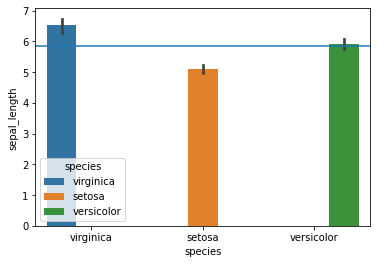

In [71]:
#Using sepal-length (y-axis) and species(x-axis)in barplot:
ax = sns.barplot(x="species", y="sepal_length", hue="species", data=train)
ax.axhline(5.83) #sepal_length mean

#### Takaways:
Just by looking at these two barplots, it is interesting to note the variances and similarities of data

#finding the means:
- train.sepal_width.mean()
- train.petal_width.mean()
- train.sepal_length.mean()
- train.petal_length.mean()

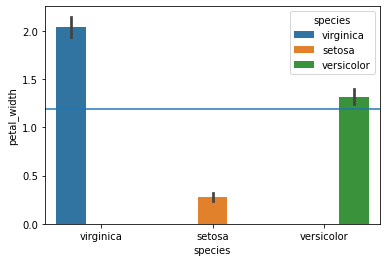

In [72]:
#Using petal-width (y-axis) and species(x-axis)in barplot:
#with horizontal line at mean()
ax = sns.barplot(x="species", y="petal_width", hue="species", data=train)
ax.axhline(1.19) #petal_length mean 

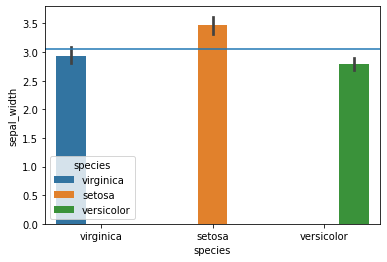

In [73]:
#Using sepal-width (y-axis) and species(x-axis)in barplot:
#with horizontal line at mean()
ax = sns.barplot(x="species", y="sepal_width", hue="species", data=train)
ax.axhline(3.06) #petal_length mean 

In [74]:
#For each measurement type, compute the descriptive statistics for each species:
train[train.species == 'virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,27.000000,27.000000,27.000000,27.000000,27.0,27.0
mean,6.518519,2.937037,5.522222,2.033333,0.0,1.0
std,0.623906,0.364953,0.519122,0.297425,0.0,0.0
min,4.900000,2.200000,4.500000,1.400000,0.0,1.0
25%,6.300000,2.650000,5.100000,1.800000,0.0,1.0
50%,6.500000,3.000000,5.600000,2.000000,0.0,1.0
75%,6.850000,3.150000,5.800000,2.300000,0.0,1.0
max,7.900000,3.800000,6.900000,2.500000,0.0,1.0


In [75]:
train[train.species == 'setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,28.000000,28.000000,28.000000,28.00000,28.0,28.0
mean,5.089286,3.467857,1.507143,0.27500,0.0,0.0
std,0.360390,0.427788,0.184448,0.12057,0.0,0.0
min,4.400000,2.300000,1.200000,0.10000,0.0,0.0
25%,4.875000,3.275000,1.400000,0.20000,0.0,0.0
50%,5.000000,3.400000,1.500000,0.20000,0.0,0.0
75%,5.400000,3.800000,1.600000,0.40000,0.0,0.0
max,5.800000,4.400000,1.900000,0.60000,0.0,0.0


In [76]:
train[train.species == 'versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,28.000000,28.000000,28.000000,28.000000,28.0,28.0
mean,5.896429,2.796429,4.271429,1.314286,1.0,0.0
std,0.425556,0.280848,0.409930,0.199470,0.0,0.0
min,4.900000,2.300000,3.300000,1.000000,1.0,0.0
25%,5.600000,2.600000,4.000000,1.200000,1.0,0.0
50%,5.800000,2.800000,4.250000,1.300000,1.0,0.0
75%,6.125000,3.000000,4.525000,1.500000,1.0,0.0
max,6.900000,3.400000,5.100000,1.800000,1.0,0.0


For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.✅ 

In [77]:
#creating objects to create subsets of species
setosa= train[train.species=='setosa']
versicolor=train[train.species=='versicolor']
virginica=train[train.species=='virginica']

In [78]:
#Mann-Whitney test: what are the odds that virginica is larger than versicolor?
# Ha= the probability of a randomly selected observation from viriginica is larger than a randomly selected observation from versicolor
# H0= a randomly selected from virginica will be equal to or smaller than a randomly selected versicolor petal
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative ='greater')
t, p

(738.0, 5.785716758274514e-10)

#Takeaway:
The odds of a random virginica petal being larger than a versicolor is fairly small of happening. 

In [79]:
# To apply the same to other measurements: create a function!

mw_test = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
#using these as a list to create a loop

for var in mw_test:
    t, p = t, p=stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative ='greater')
    print(f'Comparing {var.upper()} between viriginica and versicolor')
    print (t, p)
    print('\n')

Comparing SEPAL_LENGTH between viriginica and versicolor
738.0 5.785716758274514e-10


Comparing SEPAL_WIDTH between viriginica and versicolor
738.0 5.785716758274514e-10


Comparing PETAL_LENGTH between viriginica and versicolor
738.0 5.785716758274514e-10


Comparing PETAL_WIDTH between viriginica and versicolor
738.0 5.785716758274514e-10




#### Takeaways:
- Petal length & width are more relational to species type than sepal length & width
- Virginica has the widest petal width and longest petal length

## Multivariate Stats
- ✅ Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species. 

- ✅ Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col 

- ✅ Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization. 

- ✅ Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance). 

- ✅ Document takeaways and any actions. 

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

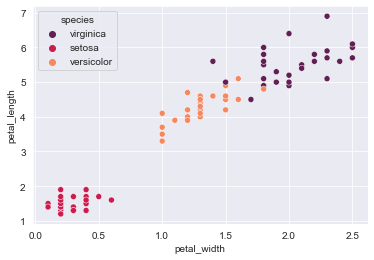

In [80]:
#Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.
sns.set_style("darkgrid")
sns.scatterplot(data=train, x="petal_width", y="petal_length", hue="species",palette ='rocket')


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

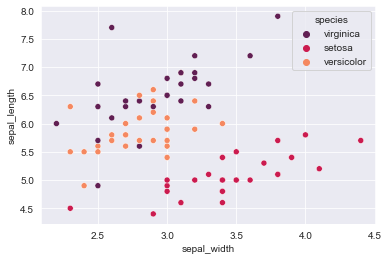

In [81]:
sns.set_style("darkgrid")
sns.scatterplot(data=train, x="sepal_width", y="sepal_length", hue="species", palette='rocket')

##Takeaways: 
looking at the two scatter plots of sepal size vs petal size furthers show the relation to species and petal sizing

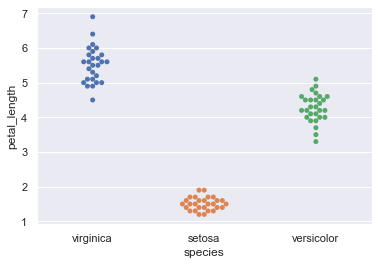

In [82]:
#Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.
sns.set_theme(style="darkgrid")
ax = sns.swarmplot(x="species", y="petal_length", data=train)

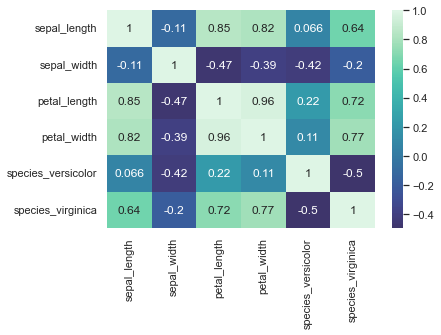

In [83]:
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)
plt.show()

In [84]:
#Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Question: Is there a significant difference of area size between Virginica and Versicolor petals?

alpha=0.05

==Hypothesis==

- H0: Petal area between versicolor and virginica iris' are the same size
- Ha: Petal area between versicolor and virginica iris' vary because of their species


In [85]:
#create objects of the subgroups for virginica petal area and versicolor petal area
vir_p_area=virginica.petal_length * virginica.petal_width
ver_p_area=versicolor.petal_length * versicolor.petal_width

In [86]:
#apply the Mann_whitney test
t, p = stats.mannwhitneyu(ver_p_area, vir_p_area, method="exact") #using exact method to prove the H0 of them being the same is true...
t, p

(6.0, 1.5688959883940062e-14)

In [87]:
#creating a column for petal areas to catplot:
train['petal_area']=train.petal_length * train.petal_width
train

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica,petal_area
123,virginica,6.3,2.7,4.9,1.8,0,1,8.82
125,virginica,7.2,3.2,6.0,1.8,0,1,10.80
112,virginica,6.8,3.0,5.5,2.1,0,1,11.55
6,setosa,4.6,3.4,1.4,0.3,0,0,0.42
67,versicolor,5.8,2.7,4.1,1.0,1,0,4.10
69,versicolor,5.6,2.5,3.9,1.1,1,0,4.29
31,setosa,5.4,3.4,1.5,0.4,0,0,0.60
144,virginica,6.7,3.3,5.7,2.5,0,1,14.25
87,versicolor,6.3,2.3,4.4,1.3,1,0,5.72
134,virginica,6.1,2.6,5.6,1.4,0,1,7.84


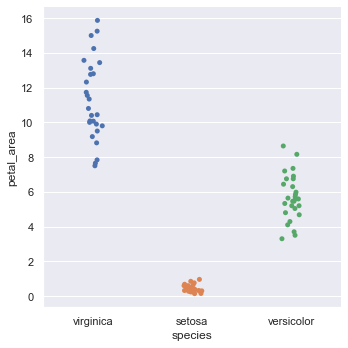

In [88]:
sns.catplot(data=train, x='species', y='petal_area', kind='strip')

Conclusion:
    - Based on the p value and the catplot visualization of petal areas:
        - WE REJECT THE NULL HYPOTHESIS

# Exercises Part ll
## Exploring the Titanic dataset

#### Explore your titanic dataset more completely.

- Determine drivers of the target variable
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.
- Does it make sense to combine any features?

- Do you find any surprises?

#### Document any and all findings and takeaways in your notebook using markdown.

In [89]:
titanic = acquire.get_titanic_data()
titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


#### Driver is Survived. I want to compare this driver to other variables to see the subgroups of who did/did not survive

In [90]:
#shows that deck has 686 nulls
# embarked and embark_town are showing the same data
#passenger_id is not needed
#pclass and class show the same data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [91]:
#Determine if certain columns should be dropped

#### Columns to drop:
- passenger_id
- embarked
- class
- deck

In [92]:
columns_to_drop = ['passenger_id', 'embarked','class', 'deck']

In [93]:
titanic = titanic.drop(columns = columns_to_drop)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1
888,0,3,female,NaN,1,2,23.4500,Southampton,0
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1


In [94]:
#Impute to fill in two nulls in embark_town with mode (most common variable)
titanic['embark_town'] = titanic.embark_town.fillna('Southhampton')

In [95]:
#nulls are filled there. I'll leave the ages alone, as I cannot estimate those
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embark_town  891 non-null    object 
 8   alone        891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 69.6+ KB


In [96]:
#creating function that splits data to begin training on...
import acquire
import prepare
titanic = acquire.new_titanic_data()
def split_titanic_data(df):
    train_validate, test = train_test_split(titanic, test_size=.2,
                                       random_state=123,
                                       stratify=titanic.survived)
    train, validate = train_test_split(train_validate, test_size=.3,
                                  random_state=123,
                                  stratify=train_validate.survived)
    return train, validate, test

In [134]:
#creating preparation of dataset for future usage (adding to prepare.py)
def prepare_titanic_data(df):
    titanic = acquire.get_titanic_data()
    columns_to_drop = ['passenger_id', 'embarked','class', 'deck']
    titanic = titanic.drop(columns = columns_to_drop)
    titanic['embark_town'] = titanic.embark_town.fillna('Southhampton')
    dummy_titanic=pd.get_dummies(titanic[['pclass','sex','sibsp','parch','embark_town','alone']],
        dummy_na= False,
        drop_first=[True, True])
    titanic = pd.concat([titanic, dummy_titanic], axis=1)
    
    train, validate, test = split_titanic_data(titanic)
    
    return train, validate, test

In [135]:
#getting freshly acquired data set:
titanic = acquire.get_titanic_data()

In [137]:
train, validate, test = prepare_titanic_data(titanic)

In [138]:
#got the train set up and going!!!!
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  498 non-null    int64  
 1   survived      498 non-null    int64  
 2   pclass        498 non-null    int64  
 3   sex           498 non-null    object 
 4   age           401 non-null    float64
 5   sibsp         498 non-null    int64  
 6   parch         498 non-null    int64  
 7   fare          498 non-null    float64
 8   embarked      497 non-null    object 
 9   class         498 non-null    object 
 10  deck          106 non-null    object 
 11  embark_town   497 non-null    object 
 12  alone         498 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 54.5+ KB


In [156]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
583,0,1,male,36.0,0,0,40.1250,Cherbourg,1
165,1,3,male,9.0,0,2,20.5250,Southampton,0
50,0,3,male,7.0,4,1,39.6875,Southampton,0
259,1,2,female,50.0,0,1,26.0000,Southampton,0
306,1,1,female,NaN,0,0,110.8833,Cherbourg,1
